<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/FEATURE_ENGINEERING_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install pandas

In [ ]:
!pip install --upgrade seaborn featuretools tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 64.8

In [ ]:
!pip list | grep seaborn

seaborn                            0.13.2


In [ ]:
!pip install --upgrade seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import featuretools as ft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from tpot import TPOTRegressor
from sklearn.datasets import fetch_california_housing

ModuleNotFoundError: No module named 'numpy.rec'

In [ ]:
# Objective: Train a machine learning model on a housing dataset using ensemle learning techniques: Bagging,Boosting and stacking
# Additionallyy, perform automated feature engineering and feature extraction from time series and geospatial data

# load dataset
california =fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

In [ ]:
# Feature Engineering with FeatureTools
es = ft.EntitySet(id= "housing")
es.add_dataframe(dataframe_name="data", dataframe=df, index="index")
es.add_dataframe(dataframe_name="data", dataframe=df, index="index")
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="data", trans_primitives=["add_numeric", "multiply_numeric"])

/usr/local/lib/python3.11/dist-packages/featuretools/entityset/entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [ ]:
# Selecting numerical features and target
x = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']].dropna()
y = df['Target']

<function matplotlib.pyplot.show(close=None, block=None)>

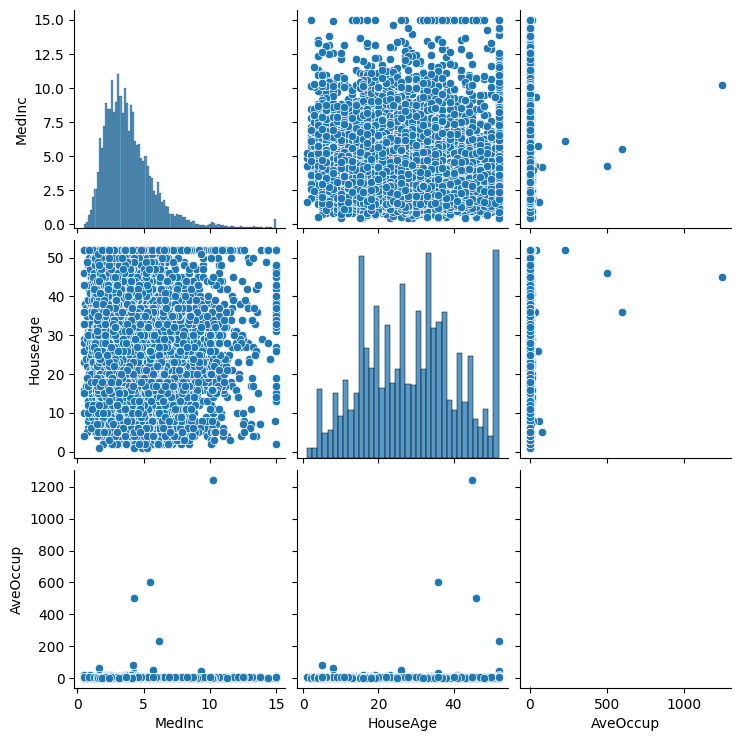

In [ ]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df[['MedInc', 'HouseAge', 'AveOccup']])
plt.show

In [ ]:
# Splirring Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
# PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Housing Data')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Apply t-SNE for Visualization
sample_size = 1000 # Reduce data for t-SNE to avoid computation overload
x_sample, y_sample = x_train[:sample_size], y_train[:sample_size]
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_sample)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:, 1], c=y_sample, cmap='viridis')
plt.colorbar(label='Target')
plt. title("t-SNE Visualization of Housing Data")
plt.show()

NameError: name 'x_train' is not defined